# Healthcare

#### Project 1

## DESCRIPTION

### Problem Statement: 

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

 

### Dataset Details: 

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.

 

## Project Task: Week 1

In [33]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
X = pd.read_csv('data.csv')
X.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [35]:
X = X.drop(['Unnamed: 0'], axis=1)

In [36]:
np.argmin(X.applymap(np.isreal).all(1))

0

In [41]:
has_nulls = X.isnull().sum()
has_nulls[has_nulls>0]

Series([], dtype: int64)

In [38]:
y = pd.read_csv('labels.csv')
y.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [39]:
y.Class.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [40]:
y.isnull().sum()

Unnamed: 0    0
Class         0
dtype: int64

### Exploratory Data Analysis:

####    Merge both the datasets.

In [42]:
df = pd.concat([X, y], axis=1)
df = df.rename(columns={'Class': 'target'})
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,target
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,sample_0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,sample_1,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,sample_2,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,sample_3,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,sample_4,BRCA


In [43]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [44]:
df.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'target'],
      dtype='object', length=20532)

In [45]:
df.dtypes

gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
               ...   
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
target         object
Length: 20532, dtype: object

####    Plot the merged dataset as a hierarchically-clustered heatmap.

In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
type(df)

pandas.core.frame.DataFrame

In [57]:
color_dict=dict(zip(df.target.unique(),'rbgcy'))
row_colors = df.target.map(color_dict)

In [58]:
color_dict

{'PRAD': 'r', 'LUAD': 'b', 'BRCA': 'g', 'KIRC': 'c', 'COAD': 'y'}

In [63]:

correlations = X.corr()


MemoryError: Unable to allocate 3.14 GiB for an array with shape (20531, 20531) and data type float64

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', 
           leaf_rotation=90);

MemoryError: Unable to allocate 1.57 GiB for an array with shape (210750715,) and data type float64

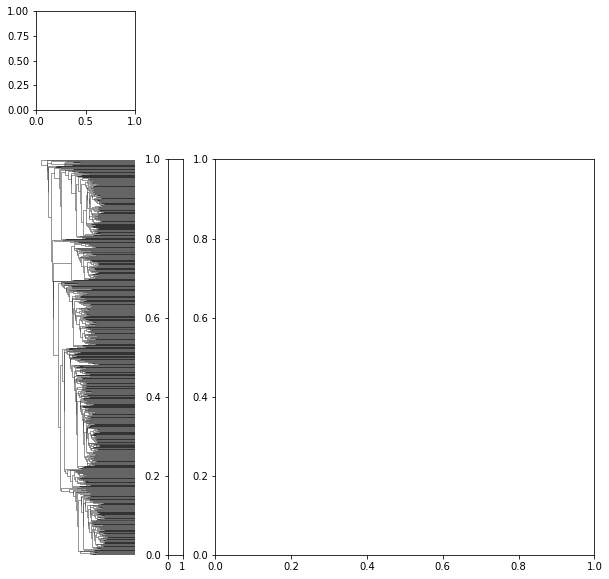

In [60]:
sns.clustermap(X,
              #metric='correlation',
              #standard_scale=1,
              row_colors=row_colors)

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

distance = linkage(X, 'ward')

In [ ]:
sns.clustermap(df, standard_scale=1)
plt.show()

sns.clustermap(df, z_score=1)
plt.show()

####    Perform Null-hypothesis testing.

### Dimensionality Reduction:

####    Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,PCA, LDA, and t-SNE.

#####    Input: Complete dataset including all genes (20531)

#####    Output: Selected Genes from each dimensionality reduction method

 

## Project Task: Week 2

### Clustering Genes and Samples:

    Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

####    First, apply the given clustering technique on all genes to identify:

#####        Genes whose expression values are similar across all samples

#####        Genes whose expression values are similar across samples of each cancer type 

####    Next, apply the given clustering technique on all samples to identify:

#####        Samples of the same class (cancer type) which also correspond to the same cluster

#####        Samples identified to be belonging to another cluster but also to the same class (cancer type)

### Building Classification Model(s) with Feature Selection:

####    Our final task is to build a robust classification model(s) for identifying each type of cancer. It also aims at the to do feature selection in order to identify the genes that help in classifying each cancer type.

 

### Sub-tasks:

####    Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

####    Apply the feature selection algorithms, forward selection and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

####    Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)